<a href="https://colab.research.google.com/github/hvyrain/bigprobasic/blob/main/%EB%AA%A8%EB%91%90%EC%9D%98%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D05_%ED%8C%8C%EC%9D%B4%EC%8D%AC%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%9F%AC%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## UNIT 13. 숫자 데이터를 쉽게 다루게 돕는 numpy 라이브러리

### 01. matplotlib 홈페이지, p204

In [ ]:
# 한글 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

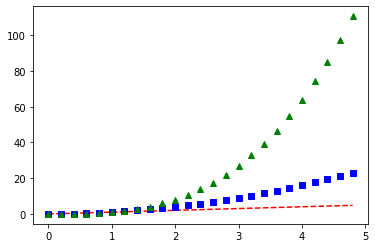

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
t = np.arange(0., 5., .2)
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

### 2. numpy 라이브러리 시작하기, p207

In [ ]:
import numpy as np
print(np.sqrt(2))
print(np.pi)
print(np.sin(0))
print(np.cos(np.pi))

1.4142135623730951
3.141592653589793
0.0
-1.0


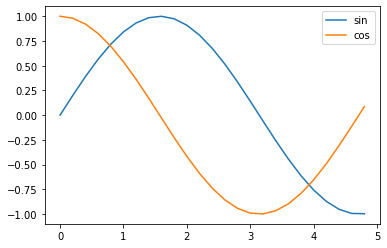

In [ ]:
# 추가 내용 : sine, cosine 그래프 그리기
s = []
c = []
for i in t :
  s.append(np.sin(i))
  c.append(np.cos(i))

plt.plot(t, s)
plt.plot(t, c)
plt.legend(['sin','cos'])
plt.show()

In [ ]:
# 난수 발생 : random.rand()
import numpy as np
a = np.random.rand(5)
print(a)
print(type(a))

# choice()
print(np.random.choice(6, 10))

#choice with no replace
print(np.random.choice(10, 6, replace=False))

# choice with probability
print(np.random.choice(6, 10, p=[.1, .2, .3, .2, .1, .1]))

[0.98956752 0.27787669 0.1916129  0.94659071 0.4856206 ]
<class 'numpy.ndarray'>
[4 2 2 0 2 5 2 2 0 5]
[6 9 1 3 7 4]
[1 4 4 1 3 3 5 1 1 0]


### 3. numpy 라이브러리를 활용해 그래프 그리기, p211

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
dice = np.random.choice(6, 10)

plt.hist(dice, bins=6)
plt.show()

## UNIT 15. 테이블 형태의 데이터를 쉽게 다루도록 도와주는 pandas 라이브러리

### 01. 위키피디어 데이터 엑셀로 저장하기
- url : https://en.wikipedia.org/wiki/All-time_Olympic_Games_medal_table  현재 되지 않음.
- 신규 url : https://en.wikipedia.org/wiki/2020_Summer_Olympics 도쿄 2020

In [ ]:
import pandas as pd
df = pd.read_html('https://en.wikipedia.org/wiki/2020_Summer_Olympics') #https://en.wikipedia.org/wiki/All-time_Olympic_Games_medal_table', header=0, index_col=0)

In [ ]:
medals = df[8]
display(medals)

,Rank,Team,Gold,Silver,Bronze,Total
0,1,United States (USA),39,41,33,113
1,2,China (CHN),38,32,18,88
2,3,Japan (JPN)*,27,14,17,58
3,4,Great Britain (GBR),22,21,22,65
4,5,ROC (ROC),20,28,23,71
5,6,Australia (AUS),17,7,22,46
6,7,Netherlands (NED),10,12,14,36
7,8,France (FRA),10,12,11,33
8,9,Germany (GER),10,11,16,37
9,10,Italy (ITA),10,10,20,40


In [ ]:
medals2020 = medals.set_index('Team')
medals2020 = medals2020.iloc[:-1, 1:]
display(medals2020)
display(medals2020.sort_values('Total', ascending=False))

,Gold,Silver,Bronze,Total
Team,,,,
United States (USA),39,41,33,113
China (CHN),38,32,18,88
Japan (JPN)*,27,14,17,58
Great Britain (GBR),22,21,22,65
ROC (ROC),20,28,23,71
Australia (AUS),17,7,22,46
Netherlands (NED),10,12,14,36
France (FRA),10,12,11,33
Germany (GER),10,11,16,37


,Gold,Silver,Bronze,Total
Team,,,,
Remaining teams,137,150,206,493
United States (USA),39,41,33,113
China (CHN),38,32,18,88
ROC (ROC),20,28,23,71
Great Britain (GBR),22,21,22,65
Japan (JPN)*,27,14,17,58
Australia (AUS),17,7,22,46
Italy (ITA),10,10,20,40
Germany (GER),10,11,16,37


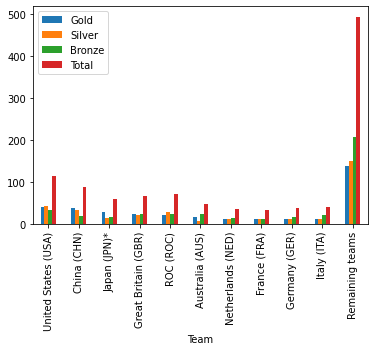

In [ ]:
medals2020.to_csv('2020도쿄올림픽메달.csv')
medals2020.plot(kind='bar', rot=90)

### 네이버 주식 데이터 가져오기
- 급등 주식 : https://finance.naver.com/sise/sise_quant_high.nhn

In [ ]:
import pandas as pd

# 네이버 주식 - 국내증시 - 급증
df = pd.read_html('https://finance.naver.com/sise/sise_quant_high.nhn', encoding='cp949', header=0, index_col=0) 
stock = df[1]
stock

,증가율,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,전일거래량,PER,Unnamed: 11
N,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.0,6399.05,일진전기,6330.0,830.0,+15.09%,6330.0,6340.0,19905164.0,306278.0,21.03,NaN
2.0,5586.26,TIGER 탄소효율그린뉴딜,9955.0,70.0,-0.70%,9950.0,9955.0,1003966.0,17656.0,NaN,NaN
3.0,4834.53,마니커,510.0,115.0,-18.40%,510.0,511.0,38479812.0,779807.0,-5.31,NaN
4.0,4112.63,유나이티드제약,52700.0,1700.0,+3.33%,52700.0,52800.0,3426382.0,81336.0,32.51,NaN
...,...,...,...,...,...,...,...,...,...,...,...
99.0,109.42,KB KRX300 ETN,12670.0,15.0,-0.12%,12650.0,12660.0,40656.0,19414.0,NaN,NaN
100.0,107.48,신풍제지,2790.0,10.0,-0.36%,2790.0,2795.0,195340.0,94147.0,2.44,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 첫 행과 마지막 열 제외
stock1 = stock.iloc[1:,:-1]
# 증가율이 NaN인 행 제외
stock1 = stock1[stock1['증가율'].notnull()]
pd.set_option('display.float_format', '{:,.2f}'.format)
stock1 = stock1.set_index('종목명')
stock1

,증가율,현재가,전일비,등락률,매수호가,매도호가,거래량,전일거래량,PER
종목명,,,,,,,,,
일진전기,"6,399.05","6,330.00",830.00,+15.09%,"6,330.00","6,340.00","19,905,164.00","306,278.00",21.03
TIGER 탄소효율그린뉴딜,"5,586.26","9,955.00",70.00,-0.70%,"9,950.00","9,955.00","1,003,966.00","17,656.00",nan
마니커,"4,834.53",510.00,115.00,-18.40%,510.00,511.00,"38,479,812.00","779,807.00",-5.31
유나이티드제약,"4,112.63","52,700.00","1,700.00",+3.33%,"52,700.00","52,800.00","3,426,382.00","81,336.00",32.51
상상인증권,"2,990.13","1,250.00",50.00,+4.17%,"1,250.00","1,255.00","2,026,165.00","65,569.00",46.30
...,...,...,...,...,...,...,...,...,...
QV 인버스 레버리지 WTI원유 선물 ETN(H),111.31,495.00,10.00,-1.98%,490.00,495.00,"351,468.00","166,325.00",nan
KBSTAR 코스닥150선물인버스,109.79,"4,510.00",25.00,-0.55%,"4,505.00","4,510.00","33,872.00","16,146.00",nan
KOSEF 단기자금,109.64,"101,170.00",15.00,+0.01%,"101,170.00","101,175.00","761,266.00","363,127.00",nan


In [ ]:
# 등락률이 숫자가 아니므로 다시 계산
stock1['등락률'] = stock1['전일비'] / (stock1['현재가']-stock1['전일비'])

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


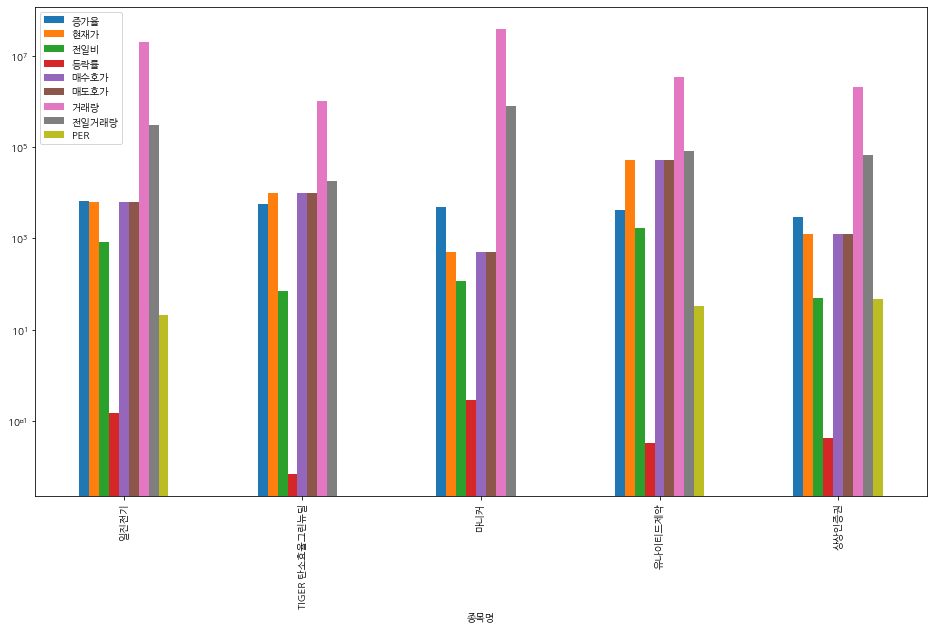

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')
stock1[:5].plot(kind='bar', rot=90, figsize=(16,9))
plt.yscale('log')
plt.show()

### 야구 데이터 가져오기

In [ ]:
import pandas as pd
df = pd.read_html('https://sports.news.naver.com/kbaseball/record/index?category=kbo')
df

In [ ]:
df[0]

,순위,팀,경기수,승,패,무,승률,게임차,연속,출루율,장타율,최근 10경기
0,1,KT,88,52,35,1,0.60,0.00,1승,0.36,0.39,7승-2패-1무
1,2,삼성,92,50,39,3,0.56,3.00,4승,0.35,0.41,4승-4패-2무
2,3,LG,86,47,37,2,0.56,3.50,2패,0.35,0.39,3승-5패-2무
3,4,키움,92,48,44,0,0.52,6.50,1패,0.35,0.38,5승-5패-0무
4,5,NC,85,42,39,4,0.52,7.00,1패,0.36,0.44,5승-3패-2무
5,6,SSG,91,44,43,4,0.51,8.00,4패,0.35,0.41,2승-6패-2무
6,7,두산,86,41,44,1,0.48,10.00,2승,0.35,0.40,4승-5패-1무
7,8,롯데,89,39,49,1,0.44,13.50,1패,0.35,0.40,5승-5패-0무
8,9,KIA,85,36,46,3,0.44,13.50,1승,0.34,0.34,4승-3패-3무
9,10,한화,92,33,56,3,0.37,20.00,1승,0.33,0.34,4승-4패-2무


In [ ]:
rank = df[0]
rank.dtypes

순위           int64
팀           object
경기수          int64
승            int64
패            int64
무            int64
승률         float64
게임차        float64
연속          object
출루율        float64
장타율        float64
최근 10경기     object
dtype: object

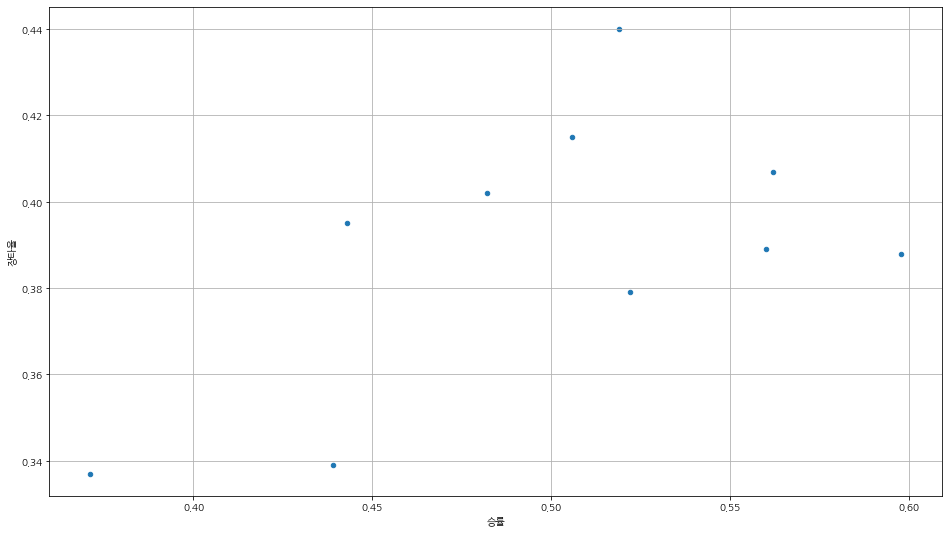

In [ ]:
temp = rank[['팀','승률','출루율','장타율']]
temp = temp.set_index('팀')
temp['OPS'] = temp['출루율']+temp['장타율']
temp.plot.scatter(x='승률',y='장타율', figsize=(16,9), grid=True)

In [ ]:
# 상관계수 ㅜㄴ석
temp.corr(method='pearson')

,승률,출루율,장타율,OPS
승률,1.00,0.73,0.57,0.63
출루율,0.73,1.00,0.76,0.86
장타율,0.57,0.76,1.00,0.99
OPS,0.63,0.86,0.99,1.00


In [ ]:
import pandas as pd
# 타자 팀 순위 from KBO
dfh = pd.read_html('https://www.koreabaseball.com/Record/Team/Hitter/Basic1.aspx')

In [ ]:
dfh1 = dfh[0]
dfh2 = dfh1.set_index('팀명')
dfh2

,순위,AVG,G,PA,AB,R,H,2B,3B,HR,TB,RBI,SAC,SF
팀명,,,,,,,,,,,,,,
두산,1,0.27,85,3374,2937,446,806,142,9,73,1185,427,25,26
NC,2,0.27,84,3341,2862,461,783,130,9,113,1270,440,38,28
삼성,3,0.27,92,3582,3108,477,848,130,12,88,1266,447,38,46
롯데,4,0.27,89,3557,3102,452,844,152,4,74,1226,437,18,28
KT,5,0.27,88,3460,2948,463,787,135,7,69,1143,431,36,21
키움,6,0.26,92,3655,3110,479,802,160,17,61,1179,447,22,38
SSG,7,0.26,91,3631,3097,463,791,127,5,119,1285,436,32,31
LG,8,0.25,86,3325,2837,390,715,122,8,84,1105,378,29,25
KIA,9,0.25,85,3336,2870,346,716,112,14,39,973,333,32,24


In [ ]:
# 투수 팀 순위
dfp = pd.read_html('https://www.koreabaseball.com/Record/Team/Pitcher/Basic1.aspx')

In [ ]:
dfp1 = dfp[0]
dfp2 = dfp1.set_index('팀명')
dfp2

,순위,ERA,G,W,L,SV,HLD,WPCT,IP,H,HR,BB,HBP,SO,R,ER,WHIP
팀명,,,,,,,,,,,,,,,,,
LG,1,3.69,86,47,37,21,47,0.56,759 1/3,690,48,321,61,593,344,311,1.33
KT,2,4.02,88,52,35,24,46,0.60,775 1/3,728,57,333,32,658,390,346,1.37
키움,3,4.05,92,48,44,21,33,0.52,815 2/3,805,73,364,50,611,422,367,1.43
삼성,4,4.25,92,50,39,30,56,0.56,807,812,91,361,34,678,422,381,1.45
두산,5,4.58,85,40,44,17,35,0.48,753,801,68,345,45,595,419,383,1.52
NC,6,4.69,84,42,38,19,51,0.53,737 2/3,766,79,366,40,613,420,384,1.53
한화,7,4.80,92,33,56,14,28,0.37,804 2/3,774,82,477,61,646,488,429,1.55
SSG,8,4.93,91,44,43,18,41,0.51,814,826,101,425,55,662,479,446,1.54
KIA,9,5.21,85,36,46,19,48,0.44,756,764,87,410,57,571,461,438,1.55


In [ ]:
dfb = pd.concat([dfh2[['AVG']], dfp2[['ERA', 'WPCT', 'WHIP']]], axis=1)
dfb = dfb[:-1]
dfb1 = pd.concat([dfb, temp], axis=1)
dfb1

,AVG,ERA,WPCT,WHIP,승률,출루율,장타율,OPS
두산,0.27,4.58,0.48,1.52,0.48,0.35,0.40,0.76
NC,0.27,4.69,0.53,1.53,0.52,0.36,0.44,0.80
삼성,0.27,4.25,0.56,1.45,0.56,0.35,0.41,0.76
롯데,0.27,5.35,0.44,1.55,0.44,0.35,0.40,0.75
KT,0.27,4.02,0.60,1.37,0.60,0.36,0.39,0.75
키움,0.26,4.05,0.52,1.43,0.52,0.35,0.38,0.73
SSG,0.26,4.93,0.51,1.54,0.51,0.35,0.41,0.77
LG,0.25,3.69,0.56,1.33,0.56,0.35,0.39,0.74
KIA,0.25,5.21,0.44,1.55,0.44,0.34,0.34,0.68
한화,0.23,4.80,0.37,1.55,0.37,0.33,0.34,0.67


In [ ]:
dfb1.corr(method='pearson')

,AVG,ERA,WPCT,WHIP,승률,출루율,장타율,OPS
AVG,1.00,-0.06,0.52,-0.07,0.53,0.83,0.77,0.82
ERA,-0.06,1.00,-0.73,0.93,-0.74,-0.28,-0.15,-0.19
WPCT,0.52,-0.73,1.00,-0.78,1.00,0.73,0.58,0.64
WHIP,-0.07,0.93,-0.78,1.00,-0.78,-0.34,-0.09,-0.15
승률,0.53,-0.74,1.00,-0.78,1.00,0.73,0.57,0.63
출루율,0.83,-0.28,0.73,-0.34,0.73,1.00,0.76,0.86
장타율,0.77,-0.15,0.58,-0.09,0.57,0.76,1.00,0.99
OPS,0.82,-0.19,0.64,-0.15,0.63,0.86,0.99,1.00


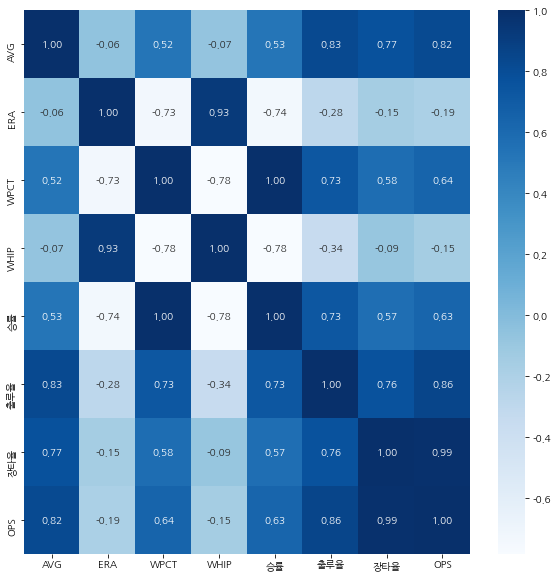

In [ ]:
# https://hooni-playground.com/943/ 상관분석
import seaborn as sns
plt.rc('axes', unicode_minus=False)
plt.subplots(figsize=(10,10))
sns.heatmap(data=dfb1.corr(), annot=True, fmt='.2f', cmap='Blues')

In [ ]:
import numpy as np
x = np.arange(1,6)
x

array([1, 2, 3, 4, 5])

In [ ]:
d = x - x.mean()
d

array([-2., -1.,  0.,  1.,  2.])

In [ ]:
d.sum()

0.0

In [ ]:
d = np.power((x-x.mean()),2)
v = d.sum() / d.shape[0]

In [ ]:
v, np.sqrt(v)

(2.0, 1.4142135623730951)